In [1]:
import pandas as pd
import re
from pyvi import ViTokenizer
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
train = pd.read_csv('./split/train.csv')
test = pd.read_csv('./split/test.csv')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    4673 non-null   object
 1   Content  4673 non-null   object
 2   Date     4673 non-null   object
 3   Url      4673 non-null   object
 4   Summary  4673 non-null   object
dtypes: object(5)
memory usage: 182.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1169 non-null   object
 1   Content  1169 non-null   object
 2   Date     1169 non-null   object
 3   Url      1169 non-null   object
 4   Summary  1169 non-null   object
dtypes: object(5)
memory usage: 45.8+ KB


## Preprocess

In [3]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))
    
stopwords = get_stopwords_list('vietnamese_stopwords_dash.txt')
# stopwords[:10]

In [4]:
def preprocessing_pipeline(text):
    text = re.sub('[^\w\s]', '', text.lower())
    text = re.sub('[/\r?\n|\r/]', ' ', text)
    text = ViTokenizer.tokenize(text)
    text =  " ".join(x for x in text.split() if x not in stopwords)
    return text

In [5]:
train_preprocessed = train
train_preprocessed['Content'] = train_preprocessed['Content'].apply(preprocessing_pipeline)
test_preprocessed = test
test_preprocessed['Content'] = test_preprocessed['Content'].apply(preprocessing_pipeline)

## Histogram

In [6]:
def plot_histogram(joined_sentences):
    # join các từ lại
    words_df = joined_sentences.split()
    # Tính số lượng từng từ có trong dataset
    words_df_dict = dict(Counter(words_df))
    words_df_dict = dict(sorted(words_df_dict.items(), key=lambda item: item[1], reverse=False))
    # plot 20 từ xuất hiện nhiều nhất
    histo = pd.DataFrame(words_df_dict.values(), index=words_df_dict.keys(), columns=['Count']).tail(20)
    histo.plot.barh()

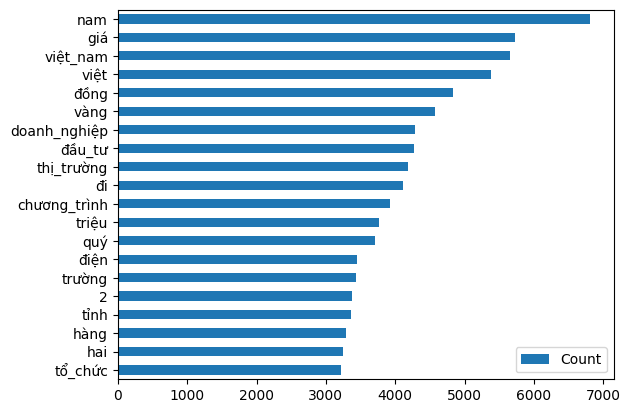

In [7]:
plot_histogram(" ".join(train_preprocessed['Content'].tolist()))

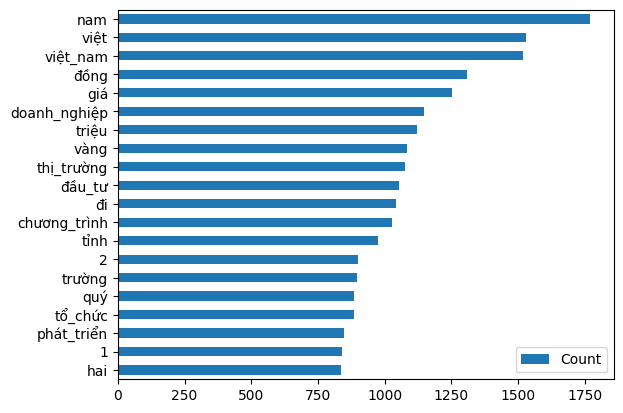

In [8]:
plot_histogram(" ".join(test_preprocessed['Content'].tolist()))

## Word cloud

In [9]:
def plot_wordcloud(sentences):
    # plt.figure(figsize=(20, 30))
    wordcloud = WordCloud(max_words=200, background_color='white').generate(sentences)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

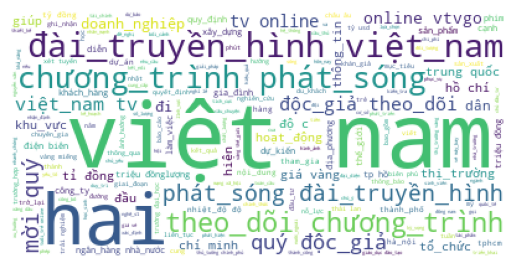

In [10]:
plot_wordcloud(" ".join(train_preprocessed['Content'].tolist()))

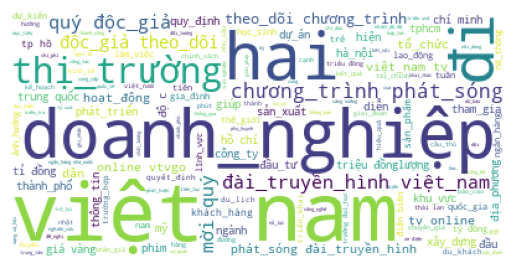

In [11]:
plot_wordcloud(" ".join(test_preprocessed['Content'].tolist()))